In [1]:
# Processing and cropping the WorldClim data to only be for Maule and Nuble

import rasterio
import geopandas as gpd
from rasterio.mask import mask

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
# Check the nuble shape file

regions = gpd.read_file("Regiones/Regional.shp")
maule = regions[regions['Region'] == 'Región del Maule'] 
nuble =  regions[regions['Region'] == 'Región de Ñuble']

maule = maule.to_crs("EPSG:4326") 
nuble = nuble.to_crs("EPSG:4326") 

<Axes: >

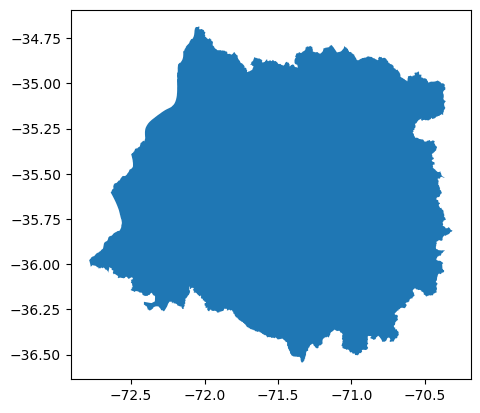

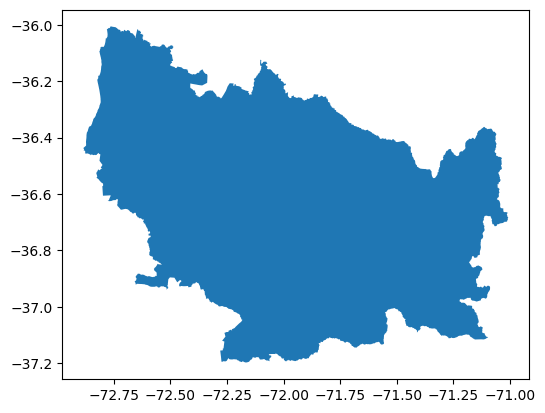

In [6]:
maule.plot()
nuble.plot()

In [23]:
### Maule Cropping ###


# Directories
input_dir = "WorldClim"
output_dir = "WorldClim_Maule"
os.makedirs(output_dir, exist_ok=True)

# Special monthly folders with decade subfolders
monthly_folders = {'max_temp_monthly', 'min_temp_monthly', 'precipitation_monthly'}

# Helper function to crop and save a tif
def crop_and_save_tif(input_path, output_path, shape):
    with rasterio.open(input_path) as src:
        out_image, out_transform = mask(src, shape.geometry, crop=True)
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        with rasterio.open(output_path, "w", **out_meta) as dest:
            dest.write(out_image)

# Loop through folders in WorldClim
for var_folder in os.listdir(input_dir):
    var_path = os.path.join(input_dir, var_folder)

    # Skip non-directories and zip folders
    if not os.path.isdir(var_path) or var_folder.lower() == 'zip':
        continue

    # Special case for monthly folders
    if var_folder in monthly_folders:
        for decade_folder in os.listdir(var_path):
            decade_path = os.path.join(var_path, decade_folder)
            if not os.path.isdir(decade_path):
                continue

            for tif_file in os.listdir(decade_path):
                if tif_file.endswith(".tif"):
                    input_tif_path = os.path.join(decade_path, tif_file)
                    output_tif_path = os.path.join(output_dir, var_folder, decade_folder, tif_file)
                    crop_and_save_tif(input_tif_path, output_tif_path, maule)

    # Regular folders
    else:
        for tif_file in os.listdir(var_path):
            if tif_file.endswith(".tif"):
                input_tif_path = os.path.join(var_path, tif_file)
                output_tif_path = os.path.join(output_dir, var_folder, tif_file)
                crop_and_save_tif(input_tif_path, output_tif_path, maule)

# Handle standalone elevation.tif
elevation_path = os.path.join(input_dir, "elevation.tif")
if os.path.exists(elevation_path):
    output_elevation = os.path.join(output_dir, "elevation.tif")
    crop_and_save_tif(elevation_path, output_elevation, maule)


In [8]:
import os
import rasterio
from rasterio.mask import mask

# Define input and output directories
input_dir = "capas/clima/WorldClim_Maule/precipitation_monthly"
output_dir = input_dir  # Output to the same directory

# Define `maule` as a GeoDataFrame with the region geometry
# Make sure `maule` is defined earlier in your script, for example:
# import geopandas as gpd
# maule = gpd.read_file("path_to_Maule_shapefile.shp")

# Helper function to crop and save a tif
def crop_and_save_tif(input_path, output_path, shape):
    with rasterio.open(input_path) as src:
        out_image, out_transform = mask(src, shape.geometry, crop=True)
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })
        with rasterio.open(output_path, "w", **out_meta) as dest:
            dest.write(out_image)

# Go through each .tif in the folder
for tif_file in os.listdir(input_dir):
    if tif_file.endswith(".tif"):
        input_path = os.path.join(input_dir, tif_file)
        output_path = os.path.join(output_dir, tif_file)
        crop_and_save_tif(input_path, output_path, maule)

print("Cropping complete.")


Cropping complete.


In [24]:
### Nuble Cropping ###

output_dir = "WorldClim_Nuble"
os.makedirs(output_dir, exist_ok=True)

# Loop through folders in WorldClim
for var_folder in os.listdir(input_dir):
    var_path = os.path.join(input_dir, var_folder)

    # Skip non-directories and zip folders
    if not os.path.isdir(var_path) or var_folder.lower() == 'zip':
        continue

    # Special case for monthly folders
    if var_folder in monthly_folders:
        for decade_folder in os.listdir(var_path):
            decade_path = os.path.join(var_path, decade_folder)
            if not os.path.isdir(decade_path):
                continue

            for tif_file in os.listdir(decade_path):
                if tif_file.endswith(".tif"):
                    input_tif_path = os.path.join(decade_path, tif_file)
                    output_tif_path = os.path.join(output_dir, var_folder, decade_folder, tif_file)
                    crop_and_save_tif(input_tif_path, output_tif_path, nuble)

    # Regular folders
    else:
        for tif_file in os.listdir(var_path):
            if tif_file.endswith(".tif"):
                input_tif_path = os.path.join(var_path, tif_file)
                output_tif_path = os.path.join(output_dir, var_folder, tif_file)
                crop_and_save_tif(input_tif_path, output_tif_path, nuble)

# Handle standalone elevation.tif
elevation_path = os.path.join(input_dir, "elevation.tif")
if os.path.exists(elevation_path):
    output_elevation = os.path.join(output_dir, "elevation.tif")
    crop_and_save_tif(elevation_path, output_elevation, nuble)
